<a href="https://colab.research.google.com/github/alejovasquez123/nuevorepositorio/blob/main/setting_de_audio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout



In [2]:
data_frecuency = pd.read_csv ("/content/mediciones teatro caribe.csv")
data_frecuency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frequency (Hz) Left    1025 non-null   float64
 1   Magnitude (dB) Left    1025 non-null   float64
 2   Phase (degrees) Left   1025 non-null   float64
 3   Frequency (Hz) Right   1025 non-null   float64
 4   Magnitude (dB) Right   1025 non-null   float64
 5   Phase (degrees) Right  1025 non-null   float64
dtypes: float64(6)
memory usage: 96.2 KB


In [3]:
data_frecuency.head()

,Frequency (Hz) Left,Magnitude (dB) Left,Phase (degrees) Left,Frequency (Hz) Right,Magnitude (dB) Right,Phase (degrees) Right
0,NaN,NaN,NaN,NaN,NaN,NaN
1,20.0,-31.49,0.00,20.0,-31.49,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN
3,23.4,-29.82,48.77,23.4,-29.82,48.77
4,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Eliminación de filas con caracteres nulos debido a la conversion de texto a CSV
data_frecuency = data_frecuency.dropna(how='all')
data_frecuency = data_frecuency.reset_index(drop=True)
data_frecuency.dropna(inplace=True)
data_frecuency.head()

,Frequency (Hz) Left,Magnitude (dB) Left,Phase (degrees) Left,Frequency (Hz) Right,Magnitude (dB) Right,Phase (degrees) Right
0,20.0,-31.49,0.00,20.0,-31.49,0.00
1,23.4,-29.82,48.77,23.4,-29.82,48.77
2,46.9,-22.42,162.32,46.9,-22.42,162.32
3,70.3,-12.90,20.31,70.3,-12.90,20.31
4,93.8,-0.40,-162.37,93.8,-0.40,-162.37


In [5]:
#Corrección de algunos caracteres que aveces pueden pasar de los software de medición
data_frecuency['Magnitude (dB) Left'] = pd.to_numeric(data_frecuency['Magnitude (dB) Left'], errors='coerce')
data_frecuency['Magnitude (dB) Right'] = pd.to_numeric(data_frecuency['Magnitude (dB) Right'], errors='coerce')
data_frecuency['Phase (degrees) Left'] = pd.to_numeric(data_frecuency['Phase (degrees) Left'], errors='coerce')
data_frecuency['Phase (degrees) Right'] = pd.to_numeric(data_frecuency['Phase (degrees) Right'], errors='coerce')

data_frecuency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frequency (Hz) Left    1025 non-null   float64
 1   Magnitude (dB) Left    1025 non-null   float64
 2   Phase (degrees) Left   1025 non-null   float64
 3   Frequency (Hz) Right   1025 non-null   float64
 4   Magnitude (dB) Right   1025 non-null   float64
 5   Phase (degrees) Right  1025 non-null   float64
dtypes: float64(6)
memory usage: 48.2 KB


In [6]:
data_frecuency.head()

,Frequency (Hz) Left,Magnitude (dB) Left,Phase (degrees) Left,Frequency (Hz) Right,Magnitude (dB) Right,Phase (degrees) Right
0,20.0,-31.49,0.00,20.0,-31.49,0.00
1,23.4,-29.82,48.77,23.4,-29.82,48.77
2,46.9,-22.42,162.32,46.9,-22.42,162.32
3,70.3,-12.90,20.31,70.3,-12.90,20.31
4,93.8,-0.40,-162.37,93.8,-0.40,-162.37


In [7]:
#Este método de interpolación es ideal para imputar datos en el tratamiento de señales de audio
#En algunos casos los analizadores de audio omiten datos de magnitud y fase cuando la coherencia
#Es inferior al 20%
data_frecuency[['Magnitude (dB) Left', 'Phase (degrees) Left',
                'Magnitude (dB) Right', 'Phase (degrees) Right',]] = \
    data_frecuency[['Magnitude (dB) Left', 'Phase (degrees) Left',
                    'Magnitude (dB) Right', 'Phase (degrees) Right',]].interpolate(limit_direction='both')
# Imprimir el dataset para mayor comprensión
#data_frecuency.to_csv("data_frecuency_imputed.csv", index=False)
data_frecuency_imputed = data_frecuency.copy()
data_frecuency_imputed.head()

,Frequency (Hz) Left,Magnitude (dB) Left,Phase (degrees) Left,Frequency (Hz) Right,Magnitude (dB) Right,Phase (degrees) Right
0,20.0,-31.49,0.00,20.0,-31.49,0.00
1,23.4,-29.82,48.77,23.4,-29.82,48.77
2,46.9,-22.42,162.32,46.9,-22.42,162.32
3,70.3,-12.90,20.31,70.3,-12.90,20.31
4,93.8,-0.40,-162.37,93.8,-0.40,-162.37


In [8]:
#Filtrado de datos para uso en el rango sonoro (20Hz a 24Khz)
data_frecuency_imputed = data_frecuency_imputed[data_frecuency_imputed['Frequency (Hz) Left'] >= 20]

data_frecuency_imputed = data_frecuency_imputed[data_frecuency_imputed["Frequency (Hz) Left"]<=24000]

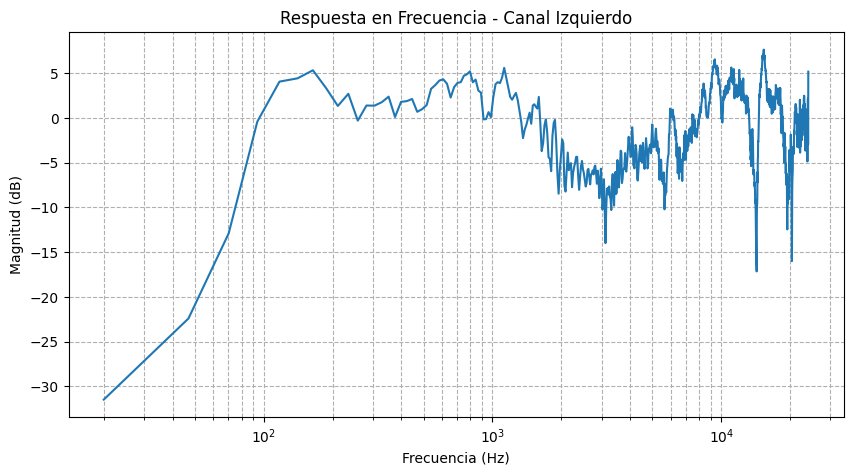

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(data_frecuency_imputed['Frequency (Hz) Left'], data_frecuency_imputed['Magnitude (dB) Left'])

plt.title('Respuesta en Frecuencia - Canal Izquierdo')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')

plt.xscale('log')  # Escala logarítmica en frecuencia (Hz)
plt.grid(True, which="both", ls="--")
plt.show()

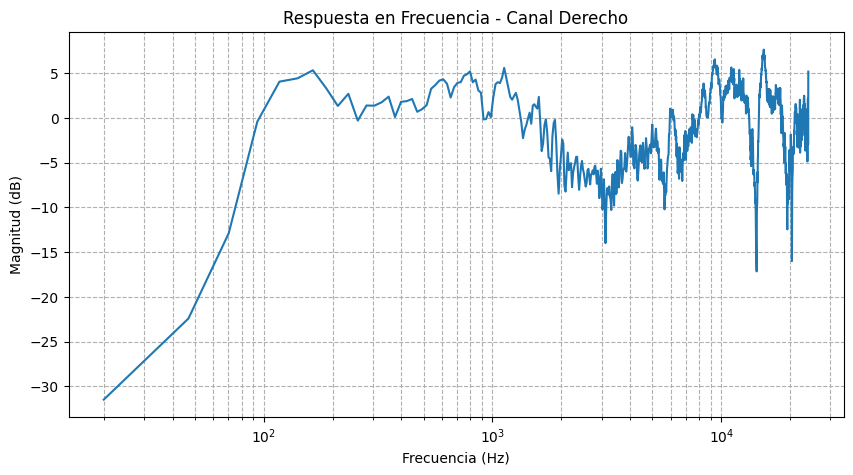

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(data_frecuency_imputed['Frequency (Hz) Right'], data_frecuency_imputed['Magnitude (dB) Right'])

plt.title('Respuesta en Frecuencia - Canal Derecho')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')

plt.xscale('log')  # Escala logarítmica en frecuencia (Hz)
plt.grid(True, which="both", ls="--")
plt.show()

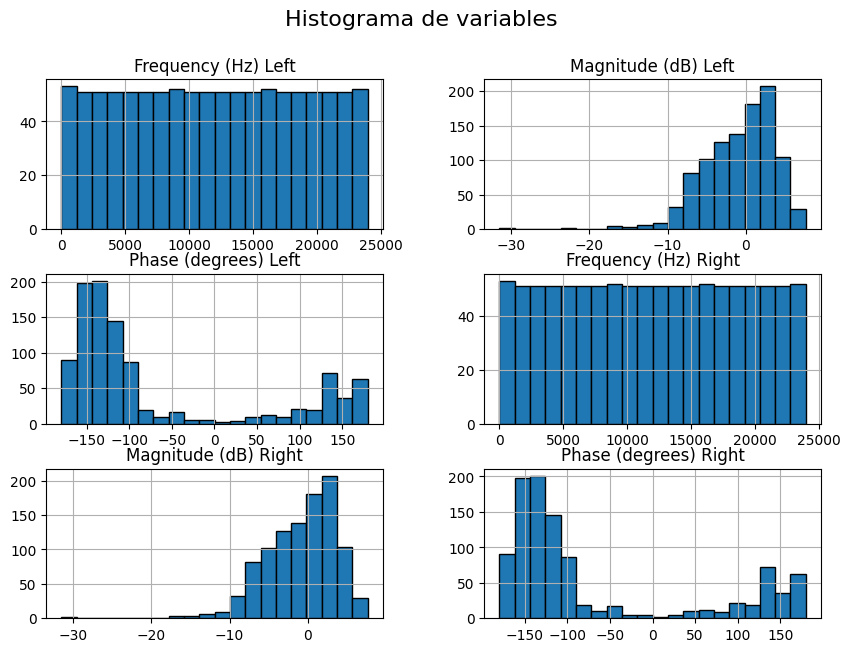

In [11]:
# Seleccionar solo columnas numéricas, ahora incluyendo "Rain"
data_frequency_numeric = data_frecuency_imputed.select_dtypes(include=['number'])
# =============================
# 1️⃣ Análisis Univariado
# =============================
# Histograma de cada feature numérica
data_frequency_numeric.hist(figsize=(10, 7), bins=20, edgecolor='black')
plt.suptitle("Histograma de variables", fontsize=16)
plt.show()

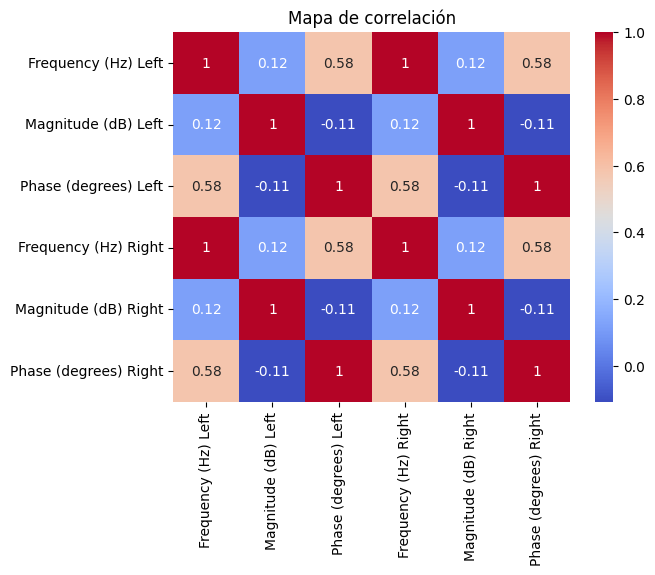

In [12]:
#Mapa de correlación
sns.heatmap(data_frecuency_imputed.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()

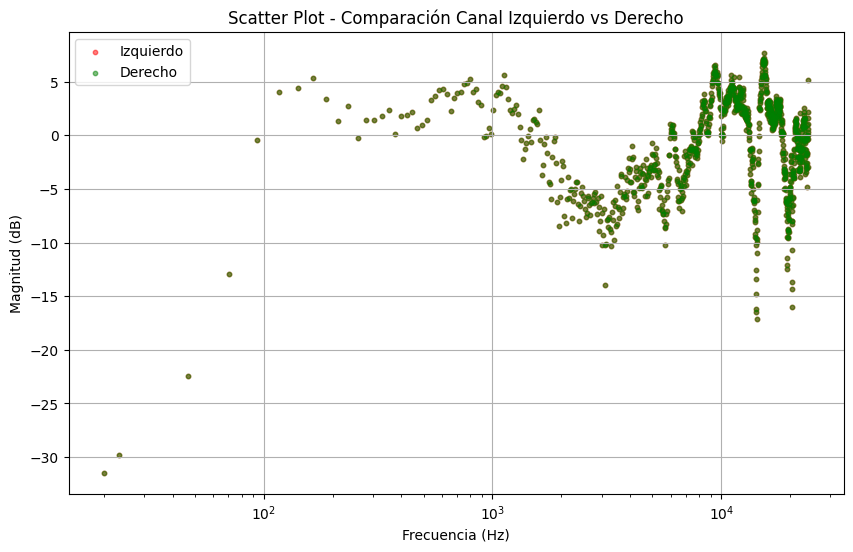

In [13]:
plt.figure(figsize=(10, 6))

plt.scatter(data_frecuency_imputed['Frequency (Hz) Left'], data_frecuency_imputed['Magnitude (dB) Left'],
            alpha=0.5, label='Izquierdo', color='red', s=10)
plt.scatter(data_frecuency_imputed['Frequency (Hz) Right'], data_frecuency_imputed['Magnitude (dB) Right'],
            alpha=0.5, label='Derecho', color='green', s=10)

plt.xscale('log')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.title('Scatter Plot - Comparación Canal Izquierdo vs Derecho')
plt.grid(True)
plt.legend()
plt.show()

In [14]:

# Extraer las columnas relevantes
frequencies = data_frecuency_imputed['Frequency (Hz) Left'].values
magnitude_left = data_frecuency_imputed['Magnitude (dB) Left'].values



In [15]:
# Definir the 12 PEQ filters (frequency, gain, Q)
filters = [
    (160, -4, 3.5), (741.0, 3, -5.2), (1130.0, -5.2, 4.5), (3070.0, 6.8, 2.2),
    (6090.3, -3.0, 4.0), (9300.0, -3.69, 4.0), (14090.0, 8.0, 5.0), (15330.0, -4.0, 5.0),
    (7000.0, 0.0, 4.9), (9380.0, -0.0, 2.0), (15328.1, 0.0, 1.5), (24000.0, 0.0, 3.0)
]



In [16]:

# Generatción datos sintéticos
np.random.seed(42)
n_samples = 1000
X = np.zeros((n_samples, len(frequencies)))

# Cada filter tiene fc, G, Q
y = np.zeros((n_samples, len(filters) * 3))

for i in range(n_samples):
    noise = np.random.normal(0, 0.5, len(frequencies))
    X[i] = magnitude_left + noise
    for j, (fc, G, Q) in enumerate(filters):
        y[i, j*3] = fc + np.random.normal(0, fc * 0.05)
        y[i, j*3 + 1] = G + np.random.normal(0, 0.5)
        y[i, j*3 + 2] = max(0.1, Q + np.random.normal(0, 0.1))



In [17]:
# Manipulación de la escala logarítmica
y[:, ::3] = np.log10(y[:, ::3])

# Normalización de datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)



In [18]:
#verificando el problema de escalas
print(np.isnan(X_scaled).sum(), np.isinf(X_scaled).sum())
print(np.isnan(y_scaled).sum(), np.isinf(y_scaled).sum())

0 0
0 0


In [19]:
# Entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)



In [20]:
#verificando el problema de escalas
print(np.isnan(X_train).sum(), np.isinf(X_train).sum())
print(np.isnan(y_train).sum(), np.isinf(y_train).sum())

0 0
0 0


In [21]:
# Modelo Red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(filters) * 3)
])


In [22]:
# Compilado del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo con parada temprana para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3,
                    callbacks=[early_stopping], verbose=1)



Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1.3923 - mae: 0.9240 - val_loss: 1.0635 - val_mae: 0.8044
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0190 - mae: 0.7910 - val_loss: 1.0367 - val_mae: 0.7931
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9884 - mae: 0.7720 - val_loss: 1.0317 - val_mae: 0.7912
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9695 - mae: 0.7652 - val_loss: 1.0334 - val_mae: 0.7918
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9601 - mae: 0.7608 - val_loss: 1.0370 - val_mae: 0.7933
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9437 - mae: 0.7553 - val_loss: 1.0408 - val_mae: 0.7945
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9179 - mae: 0.7437 - val_loss: 1.0441 - val_mae: 0.7956
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9278 - mae: 0.7470 - val_loss: 1.0464 - val_mae: 0.7964
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - lo

In [23]:
# ajuste de escalas loritmicas y evaluación
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_y.inverse_transform(y_test)



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [24]:
# Calculo métricas regresión
mse = mean_squared_error(y_test_unscaled, y_pred)
mae = mean_absolute_error(y_test_unscaled, y_pred)
r2 = r2_score(y_test_unscaled, y_pred)
print(f"Métricas del test:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



Métricas del test:
Mean Squared Error (MSE): 0.0867
Mean Absolute Error (MAE): 0.1647
R² Score: -1047296590522350956185649152.0000


In [25]:
# Predict filter parameters for the original magnitude response
magnitude_scaled = scaler_X.transform([magnitude_left])
predicted_params_scaled = model.predict(magnitude_scaled)
predicted_params = scaler_y.inverse_transform(predicted_params_scaled)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [26]:
# reversado log-scaling for frequencies
predicted_params[0, ::3] = 10 ** predicted_params[0, ::3]

# Display predicted filter parameters
print("\nPredicted filter parameters (frequency, gain, Q):")
for i in range(len(filters)):
    fc_pred = predicted_params[0, i*3]
    G_pred = predicted_params[0, i*3 + 1]
    Q_pred = predicted_params[0, i*3 + 2]
    print(f"Filter {i+1}: fc = {fc_pred:.1f} Hz, G = {G_pred:.2f} dB, Q = {Q_pred:.2f}")




Predicted filter parameters (frequency, gain, Q):
Filter 1: fc = 160.0 Hz, G = -4.01 dB, Q = 3.50
Filter 2: fc = 739.2 Hz, G = 2.98 dB, Q = 0.11
Filter 3: fc = 1129.1 Hz, G = -5.20 dB, Q = 4.50
Filter 4: fc = 3066.7 Hz, G = 6.79 dB, Q = 2.19
Filter 5: fc = 6092.0 Hz, G = -2.99 dB, Q = 4.00
Filter 6: fc = 9283.1 Hz, G = -3.70 dB, Q = 4.00
Filter 7: fc = 14050.8 Hz, G = 8.03 dB, Q = 5.00
Filter 8: fc = 15334.9 Hz, G = -4.00 dB, Q = 5.00
Filter 9: fc = 6999.0 Hz, G = 0.00 dB, Q = 4.90
Filter 10: fc = 9337.7 Hz, G = -0.00 dB, Q = 2.00
Filter 11: fc = 15275.1 Hz, G = 0.00 dB, Q = 1.50
Filter 12: fc = 24007.8 Hz, G = -0.04 dB, Q = 2.99


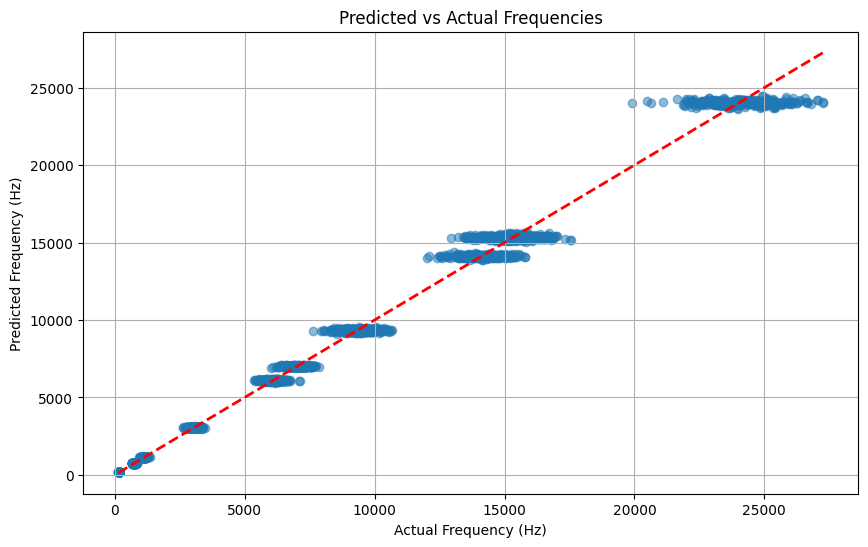

In [27]:
# Visualize prediction errors (scatter plot for frequency predictions)
plt.figure(figsize=(10, 6))
y_test_fc = 10 ** y_test_unscaled[:, ::3]  # Reverse log-scaling for frequencies
y_pred_fc = 10 ** y_pred[:, ::3]
plt.scatter(y_test_fc.flatten(), y_pred_fc.flatten(), alpha=0.5)
plt.plot([y_test_fc.min(), y_test_fc.max()], [y_test_fc.min(), y_test_fc.max()], 'r--', lw=2)
plt.xlabel('Actual Frequency (Hz)')
plt.ylabel('Predicted Frequency (Hz)')
plt.title('Predicted vs Actual Frequencies')
plt.grid(True)
plt.show()



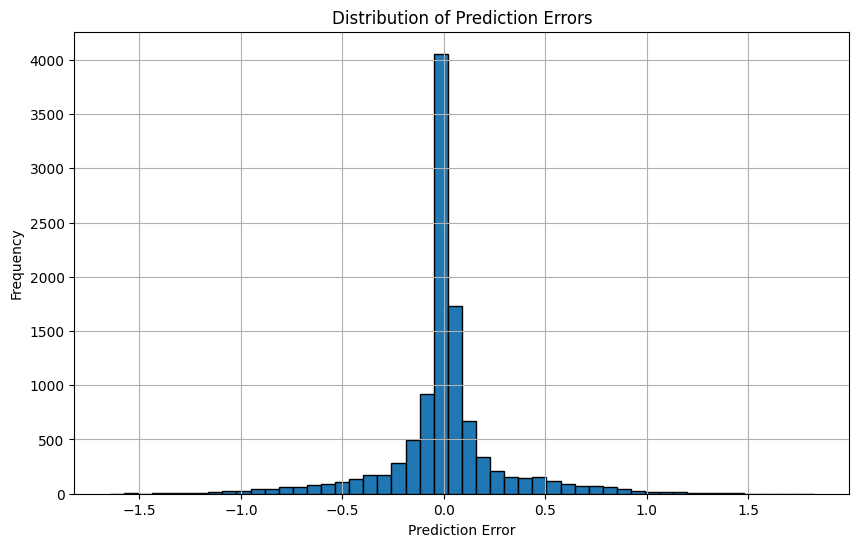

In [28]:
# Visualize residual distribution (histogram)
residuals = y_test_unscaled - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals.flatten(), bins=50, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()



In [29]:
# Simulate applying PEQ filters (improved with bell filter approximation)
def apply_peq_filters(magnitude, filters, frequencies):
    result = magnitude.copy()
    for fc, G, Q in filters:
        for i, f in enumerate(frequencies):
            w = f / fc
            gain = G / (1 + ((w - 1) / (Q * w))**2)
            result[i] += gain
    return result



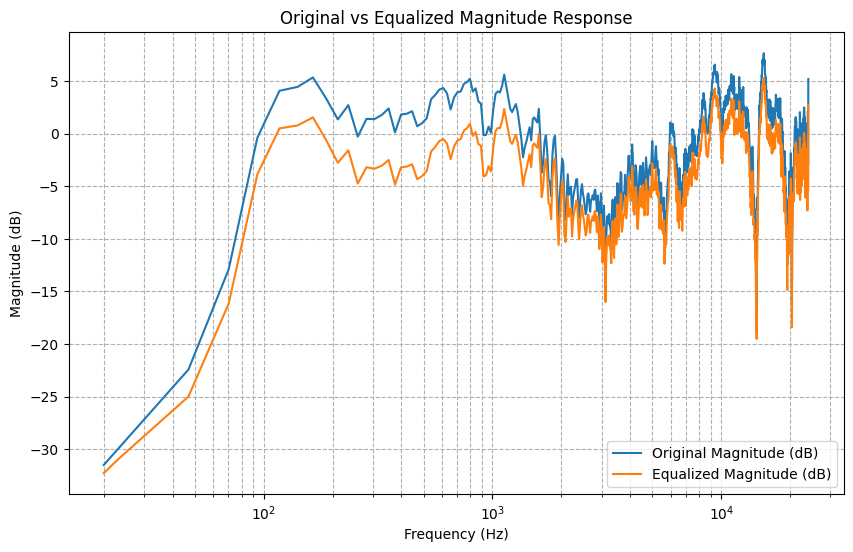

In [30]:
# Aplicación de los filtros diseñados manualmente
flattened_magnitude = apply_peq_filters(magnitude_left, filters, frequencies)

# Trazo de frecuencias originales y ecuaizadas
plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, magnitude_left, label='Original Magnitude (dB)')
plt.semilogx(frequencies, flattened_magnitude, label='Equalized Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Original vs Equalized Magnitude Response')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()



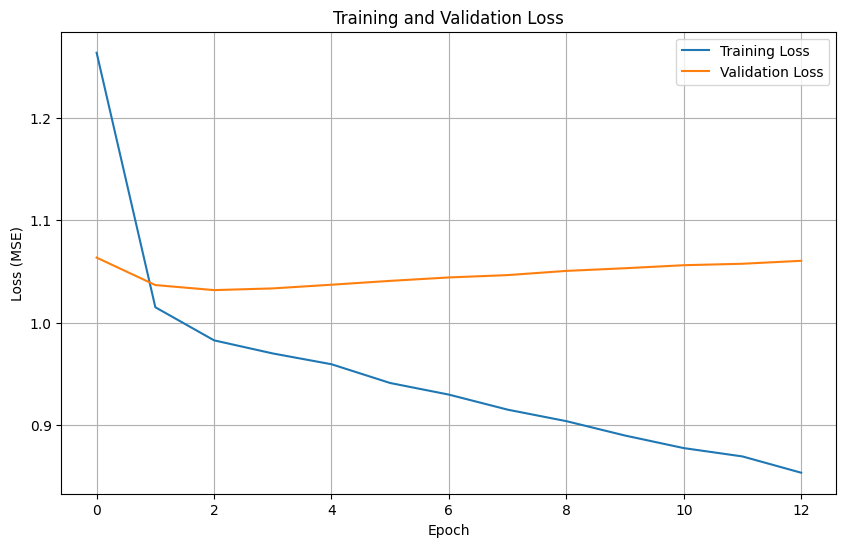

In [31]:

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

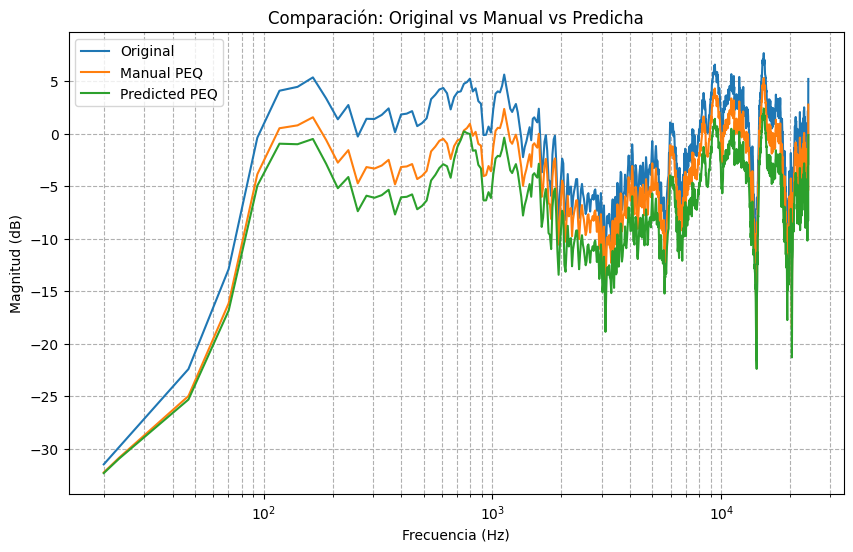

In [32]:
predicted_filters = [
    (predicted_params[0, i*3], predicted_params[0, i*3+1], predicted_params[0, i*3+2])
    for i in range(len(filters))
]
flattened_predicted = apply_peq_filters(magnitude_left, predicted_filters, frequencies)

plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, magnitude_left, label='Original')
plt.semilogx(frequencies, flattened_magnitude, label='Manual PEQ')
plt.semilogx(frequencies, flattened_predicted, label='Predicted PEQ')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.title('Comparación: Original vs Manual vs Predicha')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [33]:
# 1. Cargar nueva curva medida
data_real = pd.read_csv("/content/altavoz de prueba.csv")  # ajusta ruta y nombre

# 2. Limpieza básica
data_real = data_real.dropna(how='all').reset_index(drop=True)
data_real.dropna(inplace=True)

# 3. Conversión segura a valores numéricos
data_real['Frequency (Hz)'] = pd.to_numeric(data_real['Frequency (Hz)'], errors='coerce')
data_real['Magnitude (dB)'] = pd.to_numeric(data_real['Magnitude (dB)'], errors='coerce')

# 4. Interpolación (por si faltan datos en ciertas frecuencias)
data_real['Magnitude (dB)'] = data_real['Magnitude (dB)'].interpolate(limit_direction='both')

# 5. Asegurarse de que las frecuencias coincidan con las usadas para entrenar el modelo
# (frequencies es el vector de frecuencias base)
magnitude_real_interp = np.interp(frequencies, data_real['Frequency (Hz)'], data_real['Magnitude (dB)'])

# 6. Escalar como en el entrenamiento
magnitude_real_scaled = scaler_X.transform([magnitude_real_interp])

# 7. Predecir parámetros de filtros
predicted_params_scaled = model.predict(magnitude_real_scaled)
predicted_params = scaler_y.inverse_transform(predicted_params_scaled)
predicted_params[0, ::3] = 10 ** predicted_params[0, ::3]  # deshacer el log10 en frecuencias

# 8. Mostrar los parámetros
print("\nFiltros PEQ predichos:")
for i in range(12):
    fc = predicted_params[0, i*3]
    G = predicted_params[0, i*3+1]
    Q = predicted_params[0, i*3+2]
    print(f"Filtro {i+1}: fc = {fc:.1f} Hz, G = {G:.2f} dB, Q = {Q:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Filtros PEQ predichos:
Filtro 1: fc = 160.2 Hz, G = -4.07 dB, Q = 3.50
Filtro 2: fc = 732.7 Hz, G = 2.94 dB, Q = -0.09
Filtro 3: fc = 1131.1 Hz, G = -5.33 dB, Q = 4.49
Filtro 4: fc = 3023.1 Hz, G = 6.67 dB, Q = 2.22
Filtro 5: fc = 6013.4 Hz, G = -2.96 dB, Q = 3.99
Filtro 6: fc = 9357.8 Hz, G = -3.81 dB, Q = 3.99
Filtro 7: fc = 14080.3 Hz, G = 7.95 dB, Q = 4.99
Filtro 8: fc = 15137.7 Hz, G = -4.05 dB, Q = 4.98
Filtro 9: fc = 7040.3 Hz, G = -0.04 dB, Q = 4.91
Filtro 10: fc = 9348.4 Hz, G = -0.03 dB, Q = 1.98
Filtro 11: fc = 15487.2 Hz, G = 0.11 dB, Q = 1.50
Filtro 12: fc = 24064.8 Hz, G = -0.03 dB, Q = 3.01


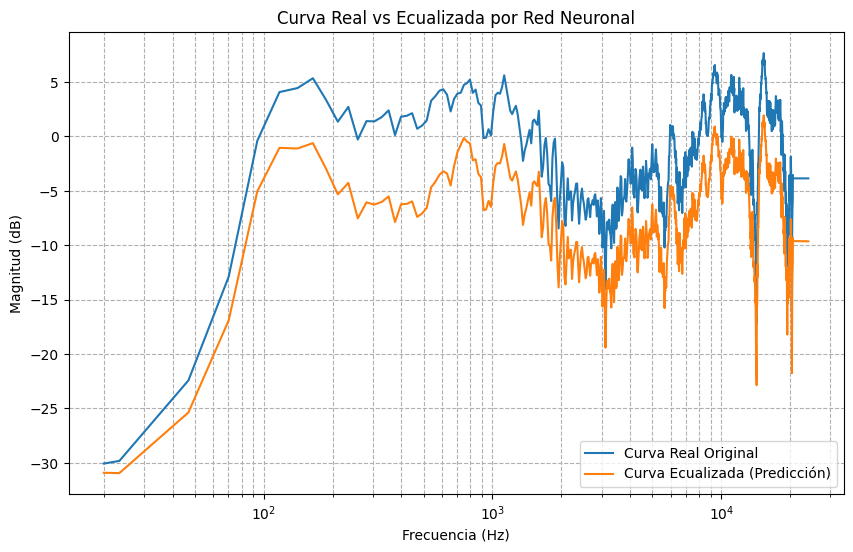

In [34]:
# Aplicar filtros predichos
predicted_filters = [
    (predicted_params[0, i*3], predicted_params[0, i*3+1], predicted_params[0, i*3+2])
    for i in range(12)
]
ecualizada = apply_peq_filters(magnitude_real_interp, predicted_filters, frequencies)

plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, magnitude_real_interp, label="Curva Real Original")
plt.semilogx(frequencies, ecualizada, label="Curva Ecualizada (Predicción)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.title("Curva Real vs Ecualizada por Red Neuronal")
plt.show()